In [1]:
# imports
from openai import OpenAI  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# initialize OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


In [2]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./images'


In [3]:
# create an image

# set the prompt
prompt = "futuristic pyramids of giza in the style of technology"

# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1711422246, data=[Image(b64_json=None, revised_prompt='Visualize the Pyramids of Giza in a futuristic concept. Imagine them transformed with advanced technology, gleaming under the warm Egyptian sun. Their ancient surfaces have been reimagined with high-tech materials, perhaps even glowing with soft neon lights at night. Robotic guardians patrol the grounds, keeping with the distinct character of the Sphinx. Advanced vehicles subtly hover above the Nile, silently moving past this spectacular juxtaposition of history and the future. The desert backdrop contrasts intriguingly with this technologically advanced setting.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-I0yk4x97NjPA2smpvRvcQtAM/user-n08uDCjiCsgFupTJEWWYOQ7E/img-izdOHLLhGYl6M3M0oMURDeEG.png?st=2024-03-26T02%3A04%3A06Z&se=2024-03-26T04%3A04%3A06Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&sk

In [4]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

./images/generated_image.png


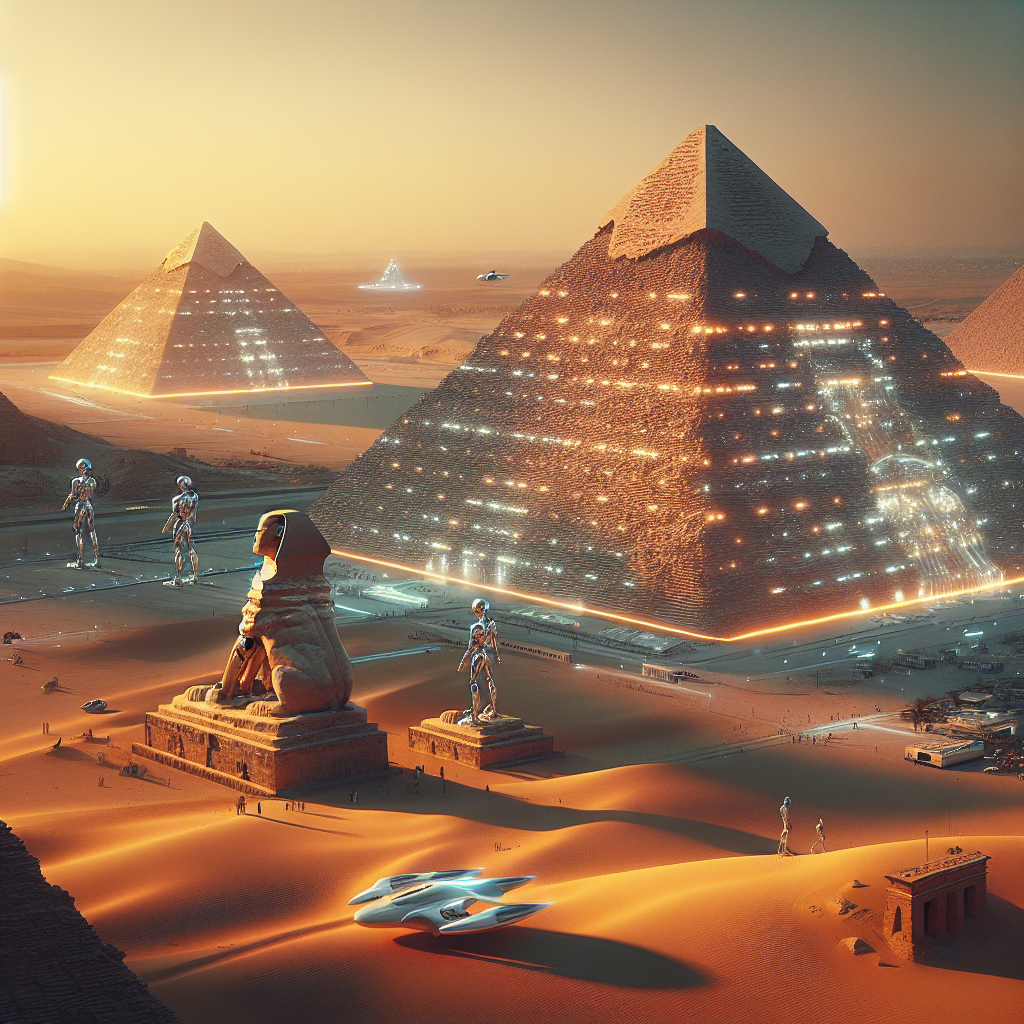

In [5]:
# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))
